<center>
<font size="4">
    <b>
    
Assessing the Safety for Human Repopulation of Fukushima Using Wild Boar as a Mammalian Proxy:<br>
Dose estimates and telomere length, dicentrics, and cortisol
    </b>
</font>
</center>

# Background
---

In March 2011, the Fukushima Daiichi nuclear disaster occurred in the Fukushima prefecture of Japan, after the Tohoku earthquake and tsunami, where three nuckear meltdowns and three hydrogen explosions released radiation into the surrounding environment. This nuclear event was the most serious since the Chernobyl accident of 1986. Today, it remains unknown whether wildlife in areas contaminated by the Fukushima Daiichi Nuclear Disaster are negatively impacted by the chronic, low-dose exposure to radiation from the accident. To assess the impacts of this exposure on wildlife's health, we've trapped >200 wild boar and a number of snakes from contaminated regions and examined doses response for a number of biomarkers. 

The biomarkers we'll evaluate for these boar include:

+ Telomere Length of blood & T-cells (measured by FISH & qPCR) &nbsp;   
+ Cortisol levels &nbsp;   
+ Dicentric chromosomes &nbsp;  
+ External / internal doses &nbsp;  
+ Dose rate at capture &nbsp;

Our collected data exists in a wide variety of locations and data formats. Our first tasks are to access, clean, and merge these data into managable dataframe objects.

# Cleaning the Data

Notebook:
[Extracting, Cleaning and Merging the Boar Data](01_Fukushima_Project_Data_Extraction_and_Cleaning.ipynb), in this notebook the following types of data are extracted, cleaned, merged (various combinations) and properly formatted into pandas dataframes for analyses:

+ boar cortisol measurements
+ boar w/ ~5000 individual telomere length measurements (teloFISH)
+ boar w/ qPCR telomere length measurements
+ boar dicentric frequencies (~100 cells per boar)
+ 4 types of new radiation dose estimates for boar
+ some telomere length, dose, age & sex data on snakes

# Visualizing the Data

Notebook:
[Exploratory data analysis](02_Fukushima_Project_Visualization_and_Statistics.ipynb), contains extensive exploratory data analysis.  
  
  In this notebook we'll explore the major findings in the data.

# Results 
--- 

In [2]:
# common data handling modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# custom module for handling telomere length data
import fukushima_telomere_methods as f_tm

# common plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# setting all graphs to have a darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
%matplotlib inline

We will visualize the relationships for our boar between two measures of dose, 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)' & 'Dose rate (uGy per h)', and three biomarkers, telomere length (by teloFISH & qPCR), dicentrics, and cortisol. 

The solid lines in the graphs represent a simple linear regression (x vs. y) between the variables; the shaded color is the line's confidence interval. 

## Boar's dose & age vs telomere length (teloFISH)

First we'll relate dose and telomere length by teloFISH in boar. Visualizations are generated using the Python library seaborn & customed functions. 

Because age is a covariate for telomere length, the relationship between age vs. telomere length is represented graphically on the right-hand plot and as a size factor for the datapoint markers on the left-hand plot.

### Visualization

In [10]:
# reading in the dataframe holding telomere FISH & dose data
merge_kelly_teloFISH_dose = pd.read_csv('../excel data/cleaned/merge_kelly_teloFISH_dose.csv')

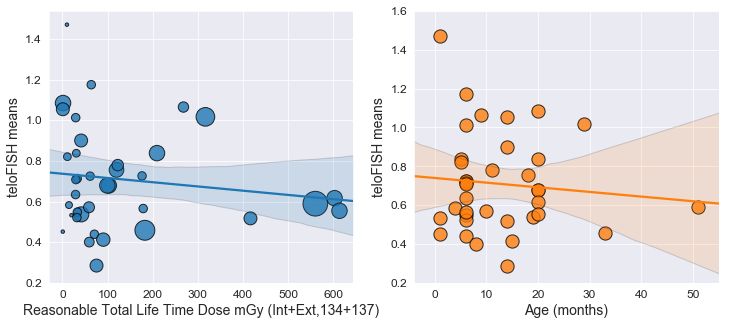

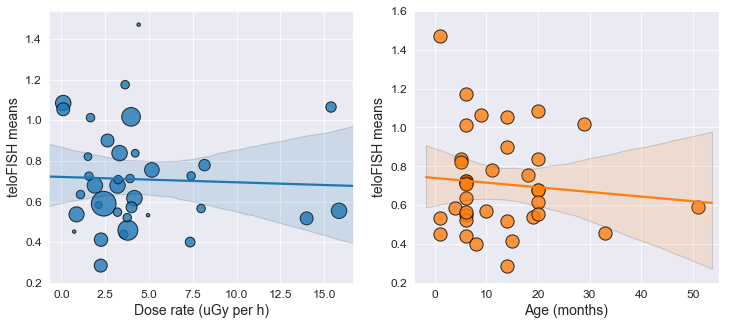

In [9]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
x2 = 'Age (months)'
y = 'teloFISH means'

for col in x: 
    f_tm.graph_dose_age_vs_telos(df=merge_kelly_teloFISH_dose, x=col, x2=x2, y=y)

### Statistics 

In [14]:
dose_types = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'teloFISH means'

for dose_type in dose_types:
    x = ['Age (months)']
    x += [dose_type]
    f_tm.score_linear_regressions(x=x, y=y, data=merge_kelly_teloFISH_dose)

Linear regression for ['Age (months)', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. teloFISH means:
Overall R2 is 0.0193

Linear regression for ['Age (months)', 'Dose rate (uGy per h)'] vs. teloFISH means:
Overall R2 is 0.0110



In [157]:
# import statsmodels.api as sm

# X = sm.add_constant(X)
# model = sm.OLS(y, X).fit()
# model.summary()

By every measure, the linear regression between telomere length & radiation exposure is nearly 0, meaning no relationship. Female boar may have a slight negative relationship between telomere length and radiation exposure, i.e shorter telomeres w/ increasing dose. The trend is very weak, however.

Now let's see see if our boar have serious chromosomal damage, dicentrics, as a function of radiation exposure.

## Boar's dose vs. dicentrics YOU ARE HERE 8:31PM 12/1/19

In [13]:
# loading data
dicentrics_exposure_df = pd.read_csv('../excel data/graphing/kelly_dicentrics_exposure_df.csv')

,Sample ID,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),Average Dicentrics per cell
0,1606101,Male,33-39,0.09918634500000001,0.307031,0.59987901456,0.672739,1.856921,2.529660,57.456,4.402778,57.456,59.985660,59.985660,7.406217,0.04
1,1606102,Female,26,0.17109145,0.568404,0.7473274536,0.812612,2.482790,3.295402,61.152,5.388871,82.992,64.447402,86.287402,3.739496,0.00


(37, 16)


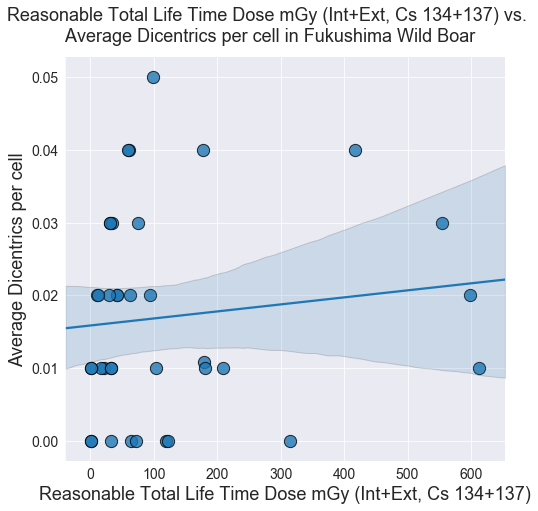

In [111]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'
y = 'Average Dicentrics per cell'
data = dicentrics_exposure_df

f_tm.linear_regression_graphs_between_variables(x=x, y=y, data=data)

In [110]:
# import statsmodels.api as sm

# x = dicentrics_exposure_df['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']
# y = dicentrics_exposure_df['Average Dicentrics per cell']

# x = sm.add_constant(x)

# model = sm.Poisson(y, x).fit()
# model.summary()

In [112]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']
y = 'Average Dicentrics per cell'

f_tm.score_linear_regressions(x=x, y=y, data=dicentrics_exposure_df)

Linear regression for ['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'] vs. Average Dicentrics per cell:
Overall R2 is 0.0132



A strong relationship is not observed between these doses of radiation and frequency of dicentrics (~100 cells scored per boar). The radiation exposure for the boar in our data set is, relatively speaking, extremely low and importantly, chronic rather than acute. At most, we see a weak positive relationship between dicentrics frequency and dose; which is expected. This is more prominent in external rather than internal dose.

## Boar's Radiation exposure vs. cortisol

It may be that while these low doses of radiation exposure do not markedly affect telomere length or dicentrics, it may still exert a stressor effect on the boar. Let's examine whether that's the case using cortisol, a marker of stress.

In [113]:
# reading in radiation/cortisol data
merge_kelly_cortisol_exposure = pd.read_csv('../excel data/graphing/merge_kelly_cortisol_exposure.csv')
merge_kelly_cortisol_exposure.drop([6, ], axis=0, inplace=True)
merge_kelly_cortisol_exposure.rename(columns={'Cortisol (pg/mg)': 'Cortisol (pg per mg)'}, inplace=True)

In [114]:
merge_kelly_cortisol_exposure.shape

(17, 17)

In [115]:
merge_kelly_cortisol_exposure.head(4)

,Sample ID,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),Sample Number (electronic sheet),Cortisol (pg per mg)
0,1607261,Female,87,0.427795975,1.365581,6.2526659706,8.329068,19.959336,28.288404,584.6400,4.838602,584.640,612.928404,612.928404,15.793377,160726-1,6.736842
1,1607262,Male,87,0.07262575,0.234437,1.0614979620000002,1.415779,3.426539,4.842318,204.6240,2.366447,277.704,209.466318,282.546318,3.307063,160726-2,7.087576
2,1607264,Female,80,0.49343977499999997,1.604350,6.631830576,8.624563,21.562464,30.187027,88.7040,34.031190,127.680,118.891027,157.867027,5.097790,160726-4,5.360000
3,1607281,Female,65,0.42985015000000004,1.384762,4.7300710506,5.856325,15.237927,21.094252,72.6264,29.044881,104.538,93.720652,125.632252,2.514613,160728-1,5.445329


In [136]:
# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


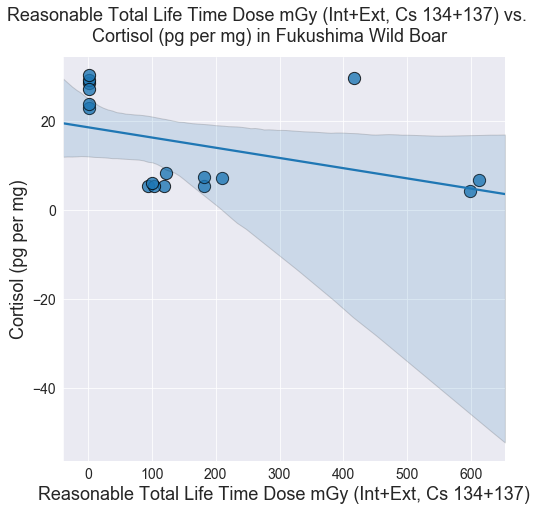

In [118]:
# sometimes when unsilencing the plot commands below, the plot will zoom in onto the lmplot
# with a ylim range of -10 to 30 and good appearance.. 

x = 'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'
y = 'Cortisol (pg per mg)'
data = merge_kelly_cortisol_exposure

f_tm.linear_regression_graphs_between_variables(x=x, y=y, data=data) 

# ax = plt.subplot()
# fig, ax= plt.figure()
# sns.regplot(x=x, y=y, data=data, fit_reg=True, ax=fig)
# ax.set(ylim=(-10, 40))
# fig = ax.fig 

# ax.set_xlabels(x, fontsize=18)
# ax.set_xticklabels(fontsize=14)
# ax.set_ylabels(y, fontsize=18)
# ax.set_yticklabels(fontdict={'fontsize':14})
# ax.set_titles(size=14)

In [138]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']
y = 'Cortisol (pg per mg)'

f_tm.score_linear_regressions(x=x, y=y, data=merge_kelly_cortisol_exposure)

Linear regression for ['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'] vs. Cortisol (pg per mg):
Overall R2 is 0.1738



In [127]:
df_log = merge_kelly_cortisol_exposure
df_log['Binary Cortisol (pg per mg)'] = df_log['Cortisol (pg per mg)'].apply(lambda x: f_tm.eval_number(x))

In [128]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'
y = 'Binary Cortisol (pg per mg)'

f_tm.score_logistic_regressions(x=x, y=y, data=df_log)

Logistic regression for Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137) vs. Binary Cortisol (pg per mg):
Overall R2 is 0.9412



In [129]:
log_reg = LogisticRegression(solver='lbfgs')

X = df_log['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'].values.reshape(-1, 1)
y = df_log['Binary Cortisol (pg per mg)'].values.reshape(-1,)

log_reg.fit(X, y)
log_reg.score(X, y)

0.9411764705882353

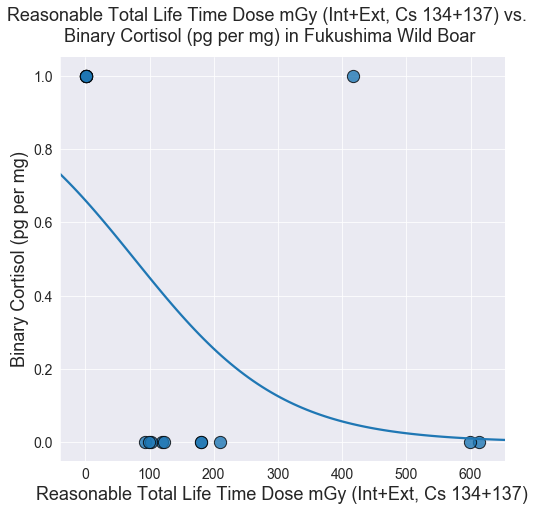

In [137]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'
y = 'Binary Cortisol (pg per mg)'
data = df_log

f_tm.linear_regression_graphs_between_variables(x=x, y=y, data=data) 

The relationship between cortisol & dose for females seems to be perturbed based on the type of dose estimate (internal, external). Let's look at a few more types of internal dose estimates to clarify.

## ...

In [74]:
teloFISH_radiation_exposure.head(4)

,Sample ID,teloFISH data,teloFISH means,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)
0,1606103,"[0.9942074384031242, 0.33512610283251376, 0.16...",0.439557,Male,29,0.151088,0.494718,0.736103,0.808553,2.410267,3.218820,68.2080,4.719123,92.5680,71.426820,95.786820,3.645807
1,1607205,"[0.26251544721880243, 0.33512610283251376, 0.3...",0.452469,Male,7,0.009513,0.028632,0.011986,0.012258,0.036077,0.048335,0.8820,5.480147,1.2600,0.930335,1.308335,0.738145
2,1607221,"[0.7707900365147816, 0.357467843021348, 0.2681...",0.533217,Male,7,0.628241,2.033350,0.791583,0.810176,2.562021,3.372197,17.6400,19.116765,23.9400,21.012197,27.312197,5.661591
3,1607231,"[1.379602456660515, 0.5306163294848134, 0.8769...",0.583101,Female,21,0.429850,1.384762,1.516511,1.620353,4.885442,6.505795,9.8784,65.858792,13.4064,16.384195,19.912195,2.614613


In [114]:
def conditional_drop(iterable, df):
    for sample in iterable:
        sample = f_tm.remove_dashes_space_sampleIDs(sample)
        
        if sample in list(df['Sample ID'].unique()):
            df = df[df['Sample ID'] != sample]
    return df

In [115]:
reconstructed_dose_boar = ['160723-1', '160803-1', 
                           '161126-1 O-205', '161126-2 F-110 GPS', 
                           '161126 F-109', '161206 O-231 GPS', 
                           '161208 O-236']

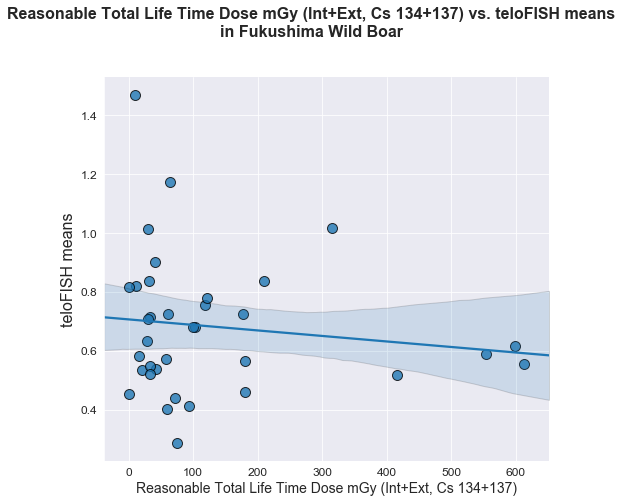

In [71]:
y_col = [
         'teloFISH means', 
#          'Average Dicentrics per cell', 
#          'Cortisol (pg per mg)'
#          'Binary Cortisol (pg per mg)'
          ]

data_frames = [
               teloFISH_radiation_exposure, 
#                dicentrics_exposure_df, 
#                merge_kelly_cortisol_exposure,
#                df_log
                ]

x_cols_to_graph = [
# 'INTERNAL Life time dose, mGy Cs 134+137',
# 'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)',
]

# hue='Sex'
# col='Sex'

hue=None
col=None

for y, data in zip(y_col, data_frames):
    data = data
#     data_drop = conditional_drop(reconstructed_dose_boar, data)
#     i=0
#     for data in [data, data_drop]:
#         if i == 0:
#             print('Non dropped data..')
#         else:
#             print('Dropped data..')
#         i+=1
            
    multiple_linear_regression_graphs_between_variables(x_cols_to_graph=x_cols_to_graph, y=y,
                                                        data=data, hue=hue, col=col,
                                                       hue_order=['Male', 'Female',],
                                                       col_order=['Male', 'Female',])

    #     score_linear_regressions(x=x, y=y_cols_to_graph[0], data=data)
#         score_logistic_regressions(x=y_cols_to_graph, y=x_col, data=data)

In [124]:
df_log = merge_kelly_cortisol_exposure
df_log['Binary Cortisol (pg per mg)'] = df_log['Cortisol (pg per mg)'].apply(lambda x: f_tm.eval_number(x))

In [125]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'
y = 'Binary Cortisol (pg per mg)'

f_tm.score_logistic_regressions(x=x, y=y, data=df_log)

Logistic regression for Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137) vs. Binary Cortisol (pg per mg):
Overall R2 is 0.9412



In [267]:
log_reg = LogisticRegression(solver='lbfgs')

X = df_log['Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)'].values.reshape(-1, 1)
y = df_log['Binary Cortisol (pg per mg)'].values.reshape(-1,)

log_reg.fit(X, y)
log_reg.score(X, y)

0.9411764705882353

## Discussion: Radiation exposure and telomere length, dicentrics, and cortisol (abbreviated 9/5/19)
---

Conclusions: Given the dose response for these biomarkers.. our data on boar/snake may serve as a useful model for establishing how these environments
could impact humans inhabiting the area..


The purpose of this investigation is to evaluate whether boar exposed to radiation in Fukushima are experiencing ill-health, to be answered by relating radiation exposure with various biomarkers. If we find strong relationships, then we propose that humans would experience similar detrimental effects. Thus far we've explored the relationships between radiation exposure (using various dose estimates) and telomere length, dicentrics, and cortisol with a distinction between male and female boar. Recall that we're measuring telomeres in T-cells, cells with exquisite sensitivty to radiation, and that telomeres are an integrated biomarker for health, where longer telomeres and shorter telomeres in general represent better and worse health respectively. Dicentric chromosomes are chromosome fusions which suggest (or could initiate) genomic instability, and cortisol is a generalized, well-accepted marker for stress.


**Telomeres:** The telomeric response to radiation is flat for males; no response. Females have a slight, extremely slight negative correlation between telomere length and radiation, which may well be an artifact of the data. On the whole, no response of telomeres to radiation. 

**Dicentrics:** The relationship between dicentrics and exposure tells a somewhat similar story. Here, the internal dose estimates show a flat relationship between exposure and dicentric frequency for males; however the external and reasonable lifetime dose show an extremely slight positive correlation. For females, the story here is similar with teloeres; a slight trend exists, but we must caution over interpretation, as the trend could be an artifact of the data's spread. 

**Cortisol:** Here the story is different between the sexes and types of dose calculation. For males, the relationship between cortisol and exposure is essentially the same regardless of the dose calculation: males with the *lowest* exposures (near zero) have the highest levels of cortisol, while the *highest* exposures have the lowest levels of cortisol. The most straightforward explanation is that wild boar with near zero exposures are living extremely close to humans and as a result, have more stress from the interactions, reflected in the cortisol; while boar living farthest away from humans, deep in the contaminated areas, have less stressful interactions and hence, lower cortisol. For females, the relationship between cortisol and exposure is identical to that of males, but not for all tests. The internal dose estimates possess a clear trend, while the external dose estimates possess no trend. This make be an artifact of our data, where we have a low number of female samples with cortisol and dose estimate data. On the whole it seems reasonable to say that females generally have a relationship between cortisol and dose that is similar to the males.

**Conclusions:** We've thus far looked at the relationship between radiation exposure, for various dose estimates, and three types of biomarkers in boar. On the whole, we do not see evidence for significant, detrimental expressions of radiation upon these biomarkers. On the contrary, boar living in the contaminated regions have lower levels of cortisol suggesting lower levels of stress. Thus far, we do not observe a strong relationship between dose and these biomarkers, suggesting that these chronic dose levels may not bear strong effects on health.
